##### Inadimplência de Clientes
##### https://www.kaggle.com/code/bajasiagian/credit-card-risk-segmentation-analysis

###### Feature name	Explanation	Remarks 
###### ID	Client number	
###### CODE_GENDER	Gender	
###### FLAG_OWN_CAR	Is there a car	
###### FLAG_OWN_REALTY	Is there a property	
###### CNT_CHILDREN	Number of children	
###### AMT_INCOME_TOTAL	Annual income	
###### NAME_INCOME_TYPE	Income category	
###### NAME_EDUCATION_TYPE	Education level	
###### NAME_FAMILY_STATUS	Marital status	
###### NAME_HOUSING_TYPE	Way of living	
###### DAYS_BIRTH	Birthday	Count backwards from current day (0), -1 means yesterday
###### DAYS_EMPLOYED	Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.
###### FLAG_MOBIL	Is there a mobile phone	
###### FLAG_WORK_PHONE	Is there a work phone	
###### FLAG_PHONE	Is there a phone	
###### FLAG_EMAIL	Is there an email	
###### OCCUPATION_TYPE	Occupation	
###### CNT_FAM_MEMBERS	Family size
###### ID	Client number	
###### MONTHS_BALANCE	Record month	The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
###### STATUS	Status	
0: 1-29 days past due 
1: 30-59 days past due 
2: 60-89 days overdue 
3: 90-119 days overdue 
4: 120-149 days overdue 
5: Overdue or bad debts, write-offs for more than 150 days 
C: paid off that month 
X: No loan for the month

In [1]:
# Importa pacotes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [51]:
# Carrega os dados
df_profile = pd.read_csv('application_record.csv')

df_credit = pd.read_csv('credit_record.csv')

In [3]:
df_profile

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
df_credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
df_profile.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [53]:
df_profile = df_profile.rename(columns={
    'CODE_GENDER' : 'gender',
    'FLAG_OWN_CAR' : 'car',
    'FLAG_OWN_REALTY' : 'property',
    'CNT_CHILDREN' : 'children',
    'AMT_INCOME_TOTAL' : 'income',
    'NAME_INCOME_TYPE' : 'employment_status',
    'NAME_EDUCATION_TYPE' : 'education_level',
    'NAME_FAMILY_STATUS' : 'marital_status',
    'NAME_HOUSING_TYPE' : 'dwelling',
    'DAYS_BIRTH' : 'age',
    'DAYS_EMPLOYED' : 'employment_length',
    'FLAG_MOBIL' : 'mobile_phone',
    'FLAG_WORK_PHONE' : 'work_phone',
    'FLAG_PHONE' : 'phone',
    'FLAG_EMAIL' : 'email',
    'OCCUPATION_TYPE' : 'job',
    'CNT_FAM_MEMBERS' : 'family_member'}
    )

Limpeza e Transformação

In [7]:
# Valores nulos
for col in df_profile.columns:
    print(col, '=', df_profile[col].isna().sum())

ID = 0
gender = 0
car = 0
property = 0
children = 0
income = 0
employment_status = 0
education_level = 0
marital_status = 0
dwelling = 0
age = 0
employment_length = 0
mobile_phone = 0
work_phone = 0
phone = 0
email = 0
job = 134203
family_member = 0


In [8]:
# Transforma dias negativos em positivos
df_profile['age'] = df_profile.age*(-1)

In [9]:
# Conta a frequência de 'employment_status' para os valores da feature 'job'
df_profile[df_profile['job'].isna()]['employment_status'].value_counts()

Pensioner               75357
Working                 35886
Commercial associate    16745
State servant            6210
Student                     5
Name: employment_status, dtype: int64

In [10]:
df_profile.groupby('job')['employment_status'].value_counts()

job                   employment_status   
Accountants           Working                 8567
                      Commercial associate    6203
                      State servant           1210
                      Pensioner                  5
Cleaning staff        Working                 4333
                                              ... 
Security staff        State servant            616
                      Pensioner                  2
Waiters/barmen staff  Working                 1045
                      Commercial associate     520
                      State servant            100
Name: employment_status, Length: 68, dtype: int64

In [11]:
# Elimina colunas desnecessárias
df_profile.drop(columns=['mobile_phone', 'email', 'work_phone', 'phone', 'job','dwelling', 'employment_status', 'marital_status'], axis=1, inplace=True)

In [12]:
# Valores nulos
for col in df_profile.columns:
    print(col, '=', df_profile[col].isna().sum())

ID = 0
gender = 0
car = 0
property = 0
children = 0
income = 0
education_level = 0
age = 0
employment_length = 0
family_member = 0


In [13]:
# Substitui valores nominais
df_profile['gender'].replace({'M': 1, 'F': 0}, inplace=True)
df_profile['car'].replace({'Y': 1, 'N': 0}, inplace=True)
df_profile['property'].replace({'Y': 1, 'N': 0}, inplace=True)
df_profile['education_level'].replace({'Lower secondary':1, 
                                       'Secondary / secondary special': 2,
                                       'Incomplete higher': 3,
                                       'Higher education': 4,
                                       'Academic degree': 5}, inplace=True)

In [14]:
df_profile['employment_length'] = np.where(df_profile.employment_length>0,0,df_profile.employment_length*(-1))

In [15]:
df_profile['income'] = df_profile['income'].astype(int)

In [16]:
df_profile2 = df_profile.copy()

df_profile2['age'] = df_profile2.age//360
df_profile2['employment_length'] = df_profile2.employment_length//360

In [17]:
# Somente os IDs comuns são relevantes para o dataset
print('IDs comuns a ambos dataframes:', df_profile2[df_profile2['ID'].isin(df_credit['ID'])]['ID'].nunique())

df_profile2 = df_profile2[df_profile['ID'].isin(df_credit['ID'])]
df_credit = df_credit[df_credit['ID'].isin(df_profile2['ID'])]

print('Número de IDs únicos do df_profile2:', df_profile2['ID'].nunique())
print('Número de IDs únicos do df_credit:', df_credit['ID'].nunique())

IDs comuns a ambos dataframes: 36457
Número de IDs únicos do df_profile2: 36457
Número de IDs únicos do df_credit: 36457


In [32]:
df_profile2.columns

Index(['ID', 'gender', 'car', 'property', 'children', 'income',
       'education_level', 'age', 'employment_length', 'family_member'],
      dtype='object')

#### Grupo de Crédito
https://www.kaggle.com/code/carterfoley/credit-card-approval-prediction-rfc

In [18]:
df_grupo = pd.crosstab(df_credit['ID'], df_credit['STATUS']).reset_index()

In [19]:
df_credit

,ID,MONTHS_BALANCE,STATUS
92938,5008804,0,C
92939,5008804,-1,C
92940,5008804,-2,C
92941,5008804,-3,C
92942,5008804,-4,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [20]:
df_grupo['sum'] = df_grupo['0']+df_grupo['1']+df_grupo['2']+df_grupo['3']+df_grupo['4']+df_grupo['5']+df_grupo['C']+df_grupo['X']

In [21]:
# Levo em consideração que todos que atrasaram apenas até 30 dias, tiveram aprovação
df_grupo['approved'] = np.where(df_grupo['sum']<= 30, 1, 0)

In [22]:
df_grupo['approved'].value_counts()

1    26993
0     9464
Name: approved, dtype: int64

In [23]:
print(df_grupo.shape)
print(df_profile2.shape)

(36457, 11)
(36457, 10)


#### Une os dois dataframes

In [25]:
df_grupo2 = df_grupo.copy()
df_grupo2 = df_grupo2[['ID', 'sum', 'approved']]

In [26]:
df = df_profile2.merge(df_grupo2, on = 'ID')

In [27]:
df.columns

Index(['ID', 'gender', 'car', 'property', 'children', 'income',
       'education_level', 'age', 'employment_length', 'family_member', 'sum',
       'approved'],
      dtype='object')

#### Criação do modelo de classificação

In [28]:
df['ID'] = df['ID'].astype(str)
df['gender'] = df['gender'].astype(str)
df['car'] = df['car'].astype(str)
df['education_level'] = df['education_level'].astype(str)
df['approved'] = df['approved'].astype(str)
df['property'] = df['property'].astype(str)

In [29]:
names_cols = ['ID', 'gender', 'car', 'education_level', 'approved','property']
df_names = df[names_cols]
for col in df_names:
    df_names[col] = df_names[col].astype(str)

C:\Users\maria.costa\AppData\Local\Temp\ipykernel_24712\3168760507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_names[col] = df_names[col].astype(str)


In [30]:
# Transforam features numéricas em uma escala única
scaler = StandardScaler()
num_cols = ['property', 'children', 'income', 'age', 'employment_length','family_member' ,'sum']
df_scaled = df[num_cols]
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=num_cols)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 36457 non-null  object 
 1   gender             36457 non-null  object 
 2   car                36457 non-null  object 
 3   property           36457 non-null  object 
 4   children           36457 non-null  int64  
 5   income             36457 non-null  int32  
 6   education_level    36457 non-null  object 
 7   age                36457 non-null  int64  
 8   employment_length  36457 non-null  int64  
 9   family_member      36457 non-null  float64
 10  sum                36457 non-null  int64  
 11  approved           36457 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 3.5+ MB


C:\Users\maria.costa\AppData\Local\Temp\ipykernel_24712\2898385691.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacoes = df.corr()


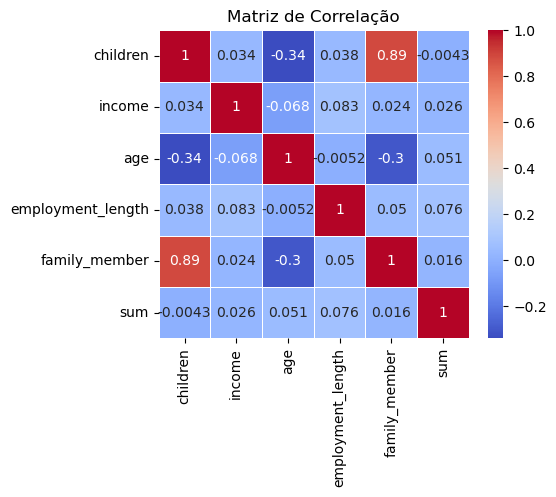

In [33]:
import seaborn as sns
correlacoes = df.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [34]:
df2 = pd.concat([df[['ID', 'gender', 'car', 'education_level',
                   'approved']], df_scaled], axis=1)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 36457 non-null  object 
 1   gender             36457 non-null  object 
 2   car                36457 non-null  object 
 3   education_level    36457 non-null  object 
 4   approved           36457 non-null  object 
 5   property           36457 non-null  float64
 6   children           36457 non-null  float64
 7   income             36457 non-null  float64
 8   age                36457 non-null  float64
 9   employment_length  36457 non-null  float64
 10  family_member      36457 non-null  float64
 11  sum                36457 non-null  float64
dtypes: float64(7), object(5)
memory usage: 3.6+ MB


In [36]:
df3 = df2.copy()
df3 = df3.drop('ID',axis=1)

In [37]:
# Divisão das variáveis X e y
X = df3.drop('approved', axis=1)
y = df3['approved']

print(X.shape, y.shape)

(36457, 10) (36457,)


In [38]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
# Divisão dos dados de validação
Train_data, Valid_data, Train_label, Valid_label = train_test_split(X_train,
                                                                    y_train,
                                                                    test_size=0.1)
print('Dados de treino:', len(Train_label))
print('Dados de validação:', len(Valid_label))
print('Dados de teste', len(y_test))

Dados de treino: 22967
Dados de validação: 2552
Dados de teste 10938


#### Testa o melhor valor de K

In [40]:
# Range de valores k para teste
K_num = range(1,30,2)

In [41]:
# Loop de tesatgem dos valores de k
accuracies = []
for k in K_num:

    # Treina o modelo
    modeloKNN = KNeighborsClassifier(n_neighbors = k)
    modeloKNN.fit(Train_data, Train_label)

    # Avalia o modelo
    score = modeloKNN.score(Valid_data, Valid_label)
    print('K = {}, acurácia = {:.2f}'.format(k, score * 100))
    accuracies.append(score)

K = 1, acurácia = 96.98
K = 3, acurácia = 96.79
K = 5, acurácia = 96.79
K = 7, acurácia = 97.45
K = 9, acurácia = 97.18
K = 11, acurácia = 97.41
K = 13, acurácia = 97.30
K = 15, acurácia = 97.41
K = 17, acurácia = 97.49
K = 19, acurácia = 97.45
K = 21, acurácia = 97.37
K = 23, acurácia = 97.37
K = 25, acurácia = 97.45
K = 27, acurácia = 97.49
K = 29, acurácia = 97.49


In [42]:
# Seleciona o valor de k
i = np.argmax(accuracies)
print('O valor de k = {}, alcançou a mais alta acurácia de {:.2} nos dados de validação.'.format(K_num[i], 
                                                                                                 accuracies[i] * 100))

O valor de k = 17, alcançou a mais alta acurácia de 9.7e+01 nos dados de validação.


##### Cria o modelo KNN

In [43]:
# Cria versão final
#modelo_final = KNeighborsClassifier(n_neighbors = K_num[i])
modelo_final = KNeighborsClassifier(n_neighbors = 7)
modelo_final.fit(Train_data, Train_label)

KNeighborsClassifier(n_neighbors=7)

#### Previsões

In [44]:
# Cria previsões com dados de teste
predictions = modelo_final.predict(X_test)
df_previsoes = pd.DataFrame({'predicoes': predictions, 'real': y_test})

In [45]:
df_previsoes.head()

,predicoes,real
31948,1,1
26240,1,1
32525,1,1
19417,1,1
14093,1,1


In [46]:
# Avaliação do modelo
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2854
           1       0.97      0.99      0.98      8084

    accuracy                           0.97     10938
   macro avg       0.96      0.95      0.96     10938
weighted avg       0.97      0.97      0.97     10938



In [47]:
df['approved'].value_counts()

1    26993
0     9464
Name: approved, dtype: int64

In [49]:
df3.columns

Index(['gender', 'car', 'education_level', 'approved', 'property', 'children',
       'income', 'age', 'employment_length', 'family_member', 'sum'],
      dtype='object')

#### Novos dados

In [98]:
colunas = ['gender', 'car', 'education_level', 'property', 'children',
       'income', 'age', 'employment_length', 'family_member', 'sum']
novos_dados = pd.DataFrame([['F', 'Y', 'Academic degree', 'N', 0, 45000, 30, 3, 25, 40]], columns=colunas)

In [100]:
# Substitui valores nominais
novos_dados['gender'].replace({'M': 1, 'F': 0}, inplace=True)
novos_dados['car'].replace({'Y': 1, 'N': 0}, inplace=True)
novos_dados['property'].replace({'Y': 1, 'N': 0}, inplace=True)
novos_dados['education_level'].replace({'Lower secondary':1, 
                                       'Secondary / secondary special': 2,
                                       'Incomplete higher': 3,
                                       'Higher education': 4,
                                       'Academic degree': 5}, inplace=True)

novos_dados['income'] = novos_dados['income'].astype(int)

In [101]:
novos_dados

,gender,car,education_level,property,children,income,age,employment_length,family_member,sum
0,0,1,5,0,0,45000,30,3,25,40


In [91]:
novos_dados['gender'] = novos_dados['gender'].astype(str)
novos_dados['car'] = novos_dados['car'].astype(str)
novos_dados['education_level'] = novos_dados['education_level'].astype(str)
novos_dados['property'] = novos_dados['property'].astype(str)

In [106]:
names_cols = ['gender', 'car', 'education_level','property']
df_names = novos_dados[names_cols]
for col in df_names:
    df_names[col] = df_names[col].astype(str)

# Transforam features numéricas em uma escala única
scaler = StandardScaler()
num_cols = ['children', 'income', 'age', 'employment_length','family_member' ,'sum']
df_scaled = novos_dados[num_cols]
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=num_cols)

novos_dados_2 = pd.concat([novos_dados[['gender', 'car', 'education_level','property']], df_scaled], axis=1)

C:\Users\maria.costa\AppData\Local\Temp\ipykernel_24712\457874708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_names[col] = df_names[col].astype(str)


In [121]:
novos_dados_2

,gender,car,education_level,property,children,income,age,employment_length,family_member,sum
0,0,1,5,0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
nova_previsao = modelo_final.predict(novos_dados_2)

In [123]:
nova_previsao

array(['1'], dtype=object)